In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [0]:
from google.colab import files
uploaded = files.upload()

Saving 04271_member_isbuy_new.csv to 04271_member_isbuy_new (1).csv


## tree 분류

In [5]:
df_raw=pd.read_csv("0427_member_isbuy_new.csv", engine="python", encoding="euc-kr")

In [10]:
df_raw = df_raw.rename({"주소(동/읍/면)":"주소"},axis='columns')

In [11]:
df_raw.head()

,Unnamed: 0,ID,나이,성별,유입경로,유입기기,회원구분,구매여부,주소,AgeGroup
0,0,cgh1385,53,남자,블로그광고,모바일,일반,1,전라북도,50-55
1,1,pjkl77,28,남자,이메일광고,PC,사업자,1,전라북도,25-30
2,2,bear011,40,남자,SNS광고,모바일,사업자,1,경기도,40-45
3,3,kim0750,44,남자,SNS광고,PC,사업자,1,경상북도,40-45
4,4,nonane9979,45,남자,블로그광고,PC,사업자,1,부산광역시,45-50


In [0]:
df_raw.isnull().sum()

Unnamed: 0    0
ID            0
나이            0
성별            0
유입경로          0
유입기기          0
회원구분          0
구매여부          0
주소            0
AgeGroup      0
dtype: int64

In [0]:
df_raw["유입경로"].unique()

array(['블로그광고', '이메일광고', 'SNS광고', '인터넷기사광고', '신문광고', '카카오톡광고', '기타',
       '지인추천', '잡지광고', '인터넷검색', '전단지광고', '유튜브광고'], dtype=object)

In [0]:
df_raw_y=df_raw["구매여부"]
df_raw_x =df_raw.drop("구매여부", axis=1, inplace = False)

In [0]:
df_raw_x_unq = df_raw_x.loc[:,"나이":"AgeGroup"]
df_x_dummy = pd.get_dummies(df_raw_x_unq)

In [0]:
df_raw_x

,Unnamed: 0,ID,나이,성별,유입경로,유입기기,회원구분,주소,AgeGroup
0,0,cgh1385,53,남자,블로그광고,모바일,일반,전라북도,50-55
1,1,pjkl77,28,남자,이메일광고,PC,사업자,전라북도,25-30
2,2,bear011,40,남자,SNS광고,모바일,사업자,경기도,40-45
3,3,kim0750,44,남자,SNS광고,PC,사업자,경상북도,40-45
4,4,nonane9979,45,남자,블로그광고,PC,사업자,부산광역시,45-50
...,...,...,...,...,...,...,...,...,...
6570,6570,wjdtnsghhh,47,남자,전단지광고,PC,일반,강원도,45-50
6571,6571,102452849@n,47,남자,블로그광고,PC,일반,-,45-50
6572,6572,jsuee8228,45,남자,전단지광고,PC,일반,경상북도,45-50
6573,6573,aaok0204,47,남자,인터넷검색,모바일,일반,경상남도,45-50


In [0]:
df_x_dummy.head()

,나이,성별_남자,성별_여자,유입경로_SNS광고,유입경로_기타,유입경로_블로그광고,유입경로_신문광고,유입경로_유튜브광고,유입경로_이메일광고,유입경로_인터넷검색,유입경로_인터넷기사광고,유입경로_잡지광고,유입경로_전단지광고,유입경로_지인추천,유입경로_카카오톡광고,유입기기_PC,유입기기_모바일,회원구분_VIP,회원구분_관리자,회원구분_딜러,회원구분_딜러 유치 회원,회원구분_사업자,회원구분_사업자(수신거부),회원구분_일반,회원구분_일반(수신거부),회원구분_전화주문 고객,회원구분_특별회원,주소_-,주소_강원도,주소_경기도,주소_경상남도,주소_경상북도,주소_광주광역시,주소_대구광역시,주소_대전광역시,주소_부산광역시,주소_서울특별시,주소_세종특별자치시,주소_오프라인,주소_울산광역시,주소_인천광역시,주소_전라남도,주소_전라북도,주소_제주특별자치도,주소_충청남도,주소_충청북도,AgeGroup_20-25,AgeGroup_25-30,AgeGroup_30-35,AgeGroup_35-40,AgeGroup_40-45,AgeGroup_45-50,AgeGroup_50-55,AgeGroup_55-60,AgeGroup_60-65,AgeGroup_65-70,AgeGroup_70-75,AgeGroup_75-80,AgeGroup_80-85,AgeGroup_85-90,AgeGroup_90-95
0,53,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,28,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,40,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,44,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,45,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [0]:
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_x_dummy,df_raw_y,test_size=0.3, random_state=1234)


print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))

"""
df_train_x,df_val_x,df_train_y,df_val_y = train_test_split(df_t_x,df_t_y,test_size=3/7, random_state=1234)
print("val data X size:{}".format(df_val_x.shape))
print("val data Y size:{}".format(df_val_y.shape))
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
"""

test data X size:(1973, 61)
test data Y size:(1973,)
train data X size:(4602, 61)
train data Y size:(4602,)


'\ndf_train_x,df_val_x,df_train_y,df_val_y = train_test_split(df_t_x,df_t_y,test_size=3/7, random_state=1234)\nprint("val data X size:{}".format(df_val_x.shape))\nprint("val data Y size:{}".format(df_val_y.shape))\nprint("train data X size:{}".format(df_train_x.shape))\nprint("train data Y size:{}".format(df_train_y.shape))\n'

In [0]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)
print("Score on training set:{:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Score on training set:0.844
Score on test set:0.343


In [0]:
train_score=[]; test_score=[]

para_leaf =[n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeRegressor(random_state =1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"]=para_leaf
df_score_leaf["TrainScore"]=train_score
df_score_leaf["TestScore"]=test_score

In [0]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.844,0.343
1,2,0.760,0.418
2,3,0.716,0.475
3,4,0.692,0.494
4,5,0.681,0.497
5,6,0.670,0.497
6,7,0.659,0.509
7,8,0.652,0.523
8,9,0.652,0.520
9,10,0.650,0.519


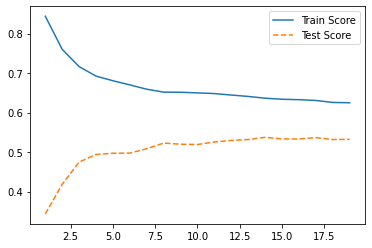

In [0]:
plt.plot(para_leaf,train_score, linestyle="-",label="Train Score")
plt.plot(para_leaf,test_score,linestyle="--",label="Test Score")
plt.legend()

In [0]:
v_feature_name =df_train_x.columns

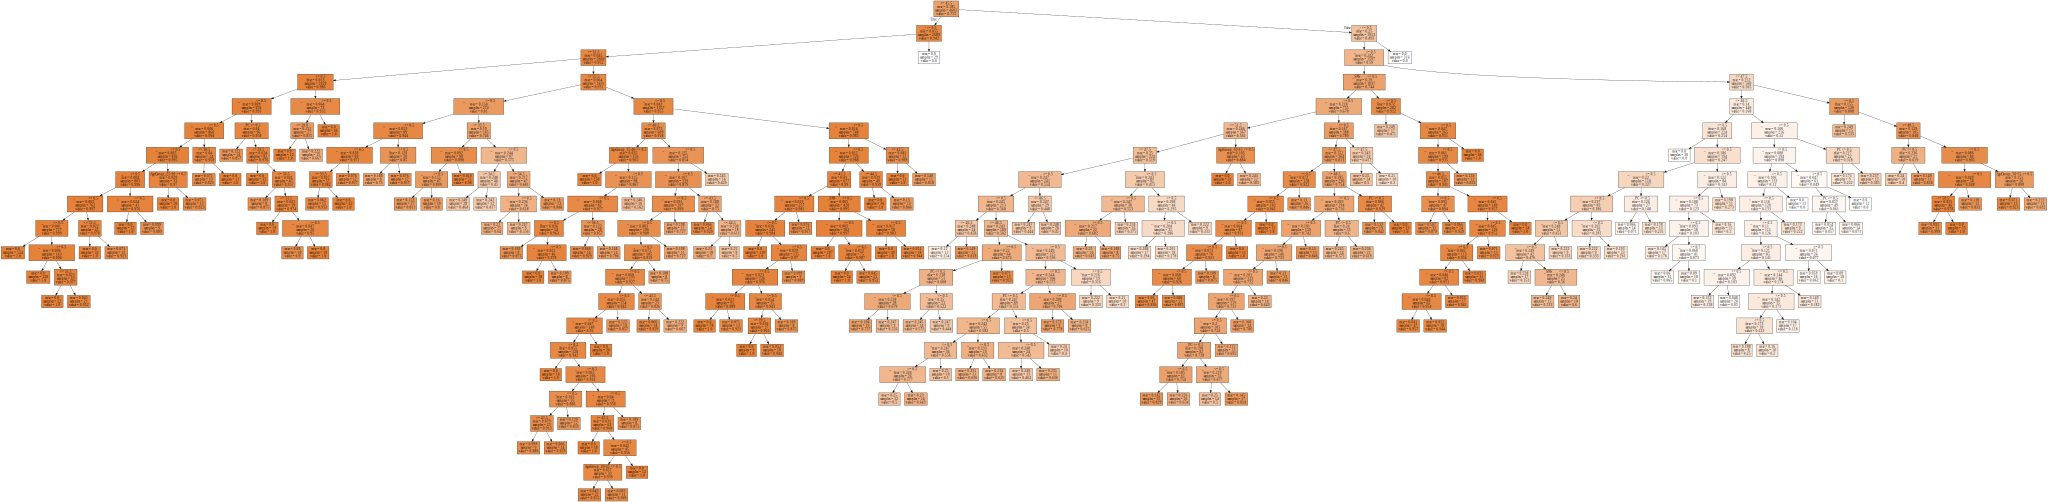

In [0]:
tree_graph =DecisionTreeRegressor(random_state=1234, min_samples_leaf=8)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot",feature_names=v_feature_name, impurity=True,filled=True)
with open("tree_leaf.dot") as f:
    dot_graph =f.read()
display(graphviz.Source(dot_graph))

In [0]:
train_score=[]; test_score=[]
para_split=[n_split*2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8,min_samples_split=v_min_samples_split)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
df_score_split=pd.DataFrame()
df_score_split["MinSamplesSplit"]=para_split
df_score_split["TrainScore"]=train_score
df_score_split["TestScore"]=test_score

In [0]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.652,0.523
1,6,0.652,0.523
2,8,0.652,0.523
3,10,0.652,0.523
4,12,0.652,0.523
5,14,0.652,0.523
6,16,0.652,0.523
7,18,0.652,0.523
8,20,0.651,0.522
9,22,0.650,0.522


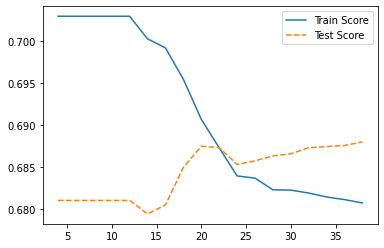

In [0]:
plt.plot(para_split, train_score, linestyle="-",label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.legend()

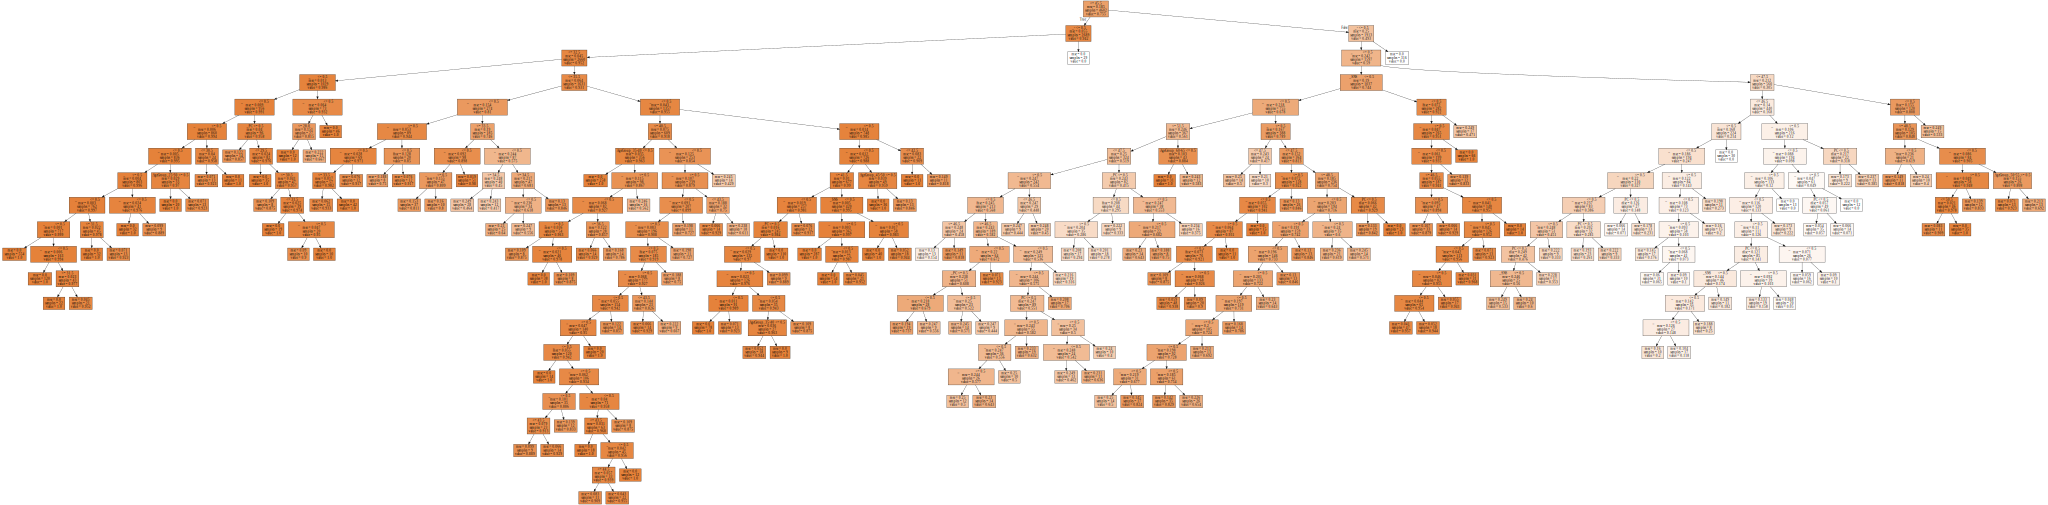

In [0]:
tree_graph =DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph, out_file="tree_split.dot",feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [0]:
train_score=[]; test_score=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree =DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20, max_depth=v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
df_score_depth=pd.DataFrame()
df_score_depth["Depth"]=para_depth
df_score_depth["TrainScore"] =train_score
df_score_depth["TestScore"]= test_score

In [0]:
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.265,0.207
1,2,0.404,0.344
2,3,0.488,0.408
3,4,0.554,0.491
4,5,0.578,0.526
5,6,0.602,0.540
6,7,0.620,0.544
7,8,0.630,0.532
8,9,0.636,0.528
9,10,0.642,0.528


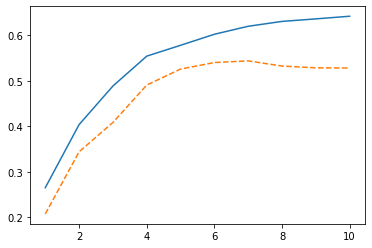

In [0]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.show()

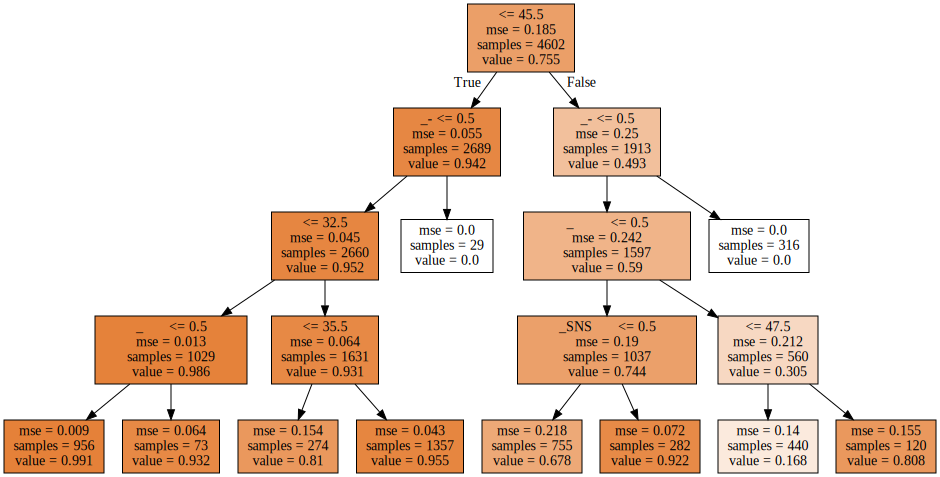

In [0]:
tree_graph =DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20, max_depth=4)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph, out_file="tree_split.dot",feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [0]:
tree_final =DecisionTreeRegressor(min_samples_leaf = 8, min_samples_split = 20, max_depth =4, random_state =1234)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=8, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

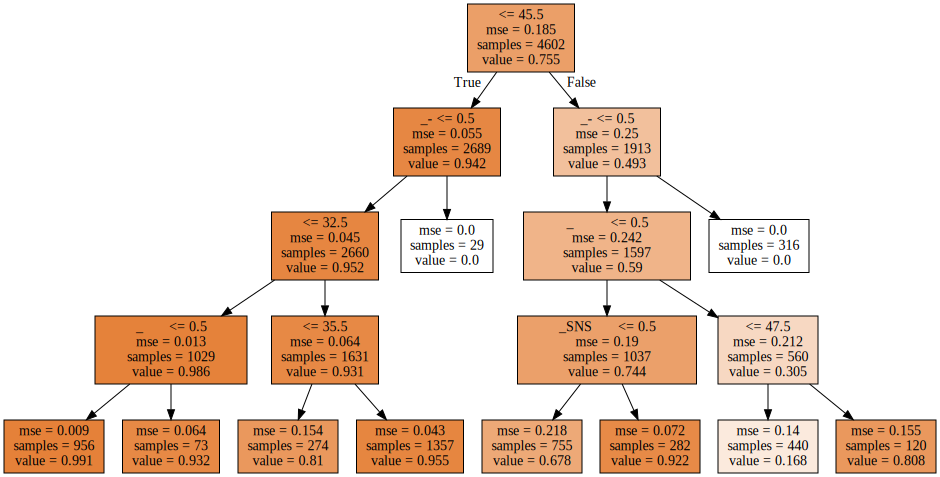

<function matplotlib.pyplot.show>

In [0]:
export_graphviz(tree_final, out_file="tree_final.dot", feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_final.dot") as f:
    dot_graph =f.read()
display(graphviz.Source(dot_graph))
plt.show

## 로지스틱

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [0]:

from sklearn.preprocessing import scale, minmax_scale, robust_scale


from statsmodels.formula.api import ols
from statsmodels.api import qqplot,add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib inline

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [0]:
df_raw.head()

,Unnamed: 0,ID,나이,성별,유입경로,유입기기,회원구분,구매여부,주소,AgeGroup
0,0,cgh1385,53,남자,블로그광고,모바일,일반,1,전라북도,50-55
1,1,pjkl77,28,남자,이메일광고,PC,사업자,1,전라북도,25-30
2,2,bear011,40,남자,SNS광고,모바일,사업자,1,경기도,40-45
3,3,kim0750,44,남자,SNS광고,PC,사업자,1,경상북도,40-45
4,4,nonane9979,45,남자,블로그광고,PC,사업자,1,부산광역시,45-50


In [0]:
df_train,df_test =train_test_split(df_raw, test_size=0.3, random_state=1234)

print("train data set:{}".format(df_train.shape))
print("test data set:{}".format(df_test.shape))

train data set:(4602, 10)
test data set:(1973, 10)


In [0]:
log_model = Logit.from_formula("구매여부~ 나이 + C(성별) + C(유입경로) + C(회원구분) + C(AgeGroup) + C(주소)",df_train) 

log_result = log_model.fit()
print(log_result.summary())

         Current function value: 0.293123
         Iterations: 35


LinAlgError: ignored